In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

In [7]:
# load json as dict
with open("sequential_times.json") as f:
    sequential = json.load(f)
with open("parallel_times.json") as f:
    parallel = json.load(f)
with open("session_sizes.json") as f:
    session_sizes = json.load(f)


/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/3883233280.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/3883233280.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df['Dataset'], rotation=30)


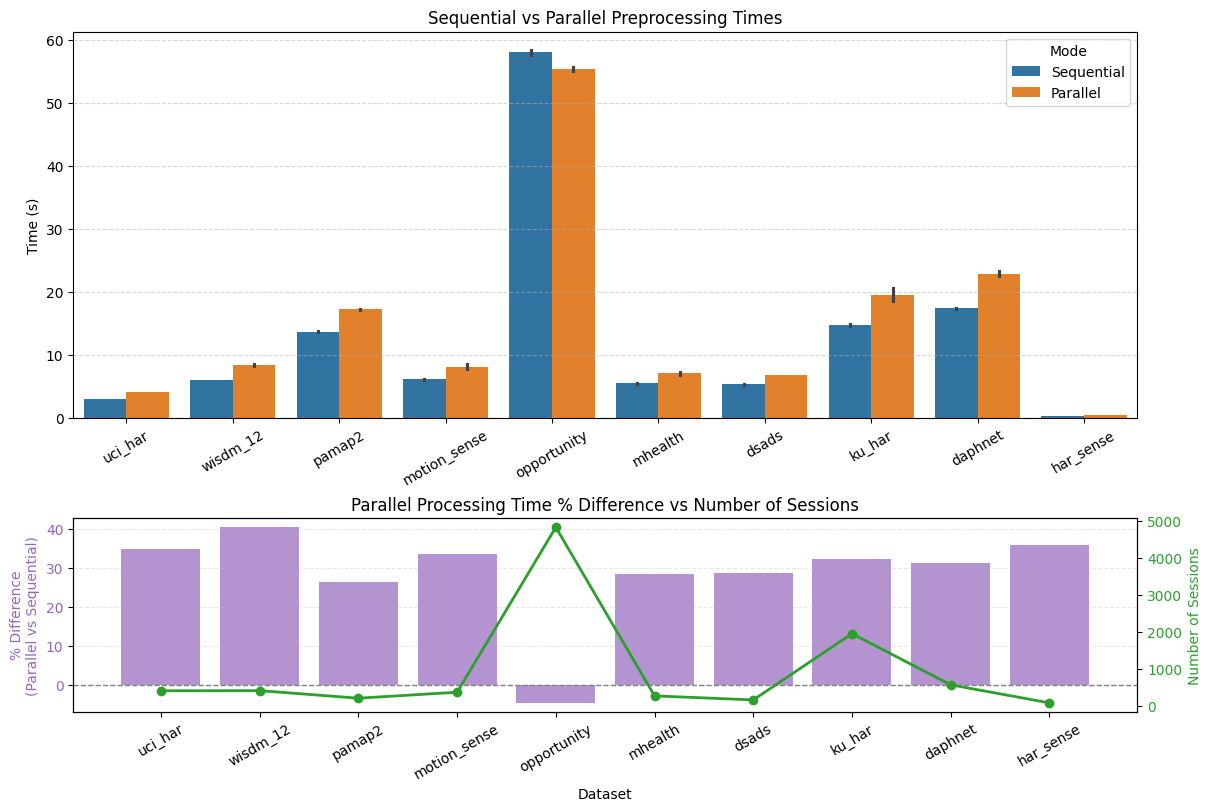

In [ ]:
# Prepare dataframe for sequential vs parallel times
records = []
for dataset in sequential:
    for t in sequential[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Sequential"})
    for t in parallel[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Parallel"})

df = pd.DataFrame(records)

# Calculate % difference and session count
diff_data = []
for dataset in sequential:
    seq_avg = sum(sequential[dataset]) / len(sequential[dataset])
    par_avg = sum(parallel[dataset]) / len(parallel[dataset])
    # % difference = (parallel - sequential) / sequential * 100
    pct_diff = ((par_avg - seq_avg) / seq_avg) * 100 if seq_avg != 0 else float("nan")
    session_count = len(session_sizes[dataset])
    diff_data.append(
        {"Dataset": dataset, "% Difference": pct_diff, "Session Count": session_count}
    )

diff_df = pd.DataFrame(diff_data)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(12, 8),
    gridspec_kw={"height_ratios": [2, 1]},
    constrained_layout=True,
)

# Barplot Sequential vs Parallel times
sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
ax1.set_title("Sequential vs Parallel Preprocessing Times")
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("")
ax1.tick_params(axis="x", rotation=30)
ax1.legend(title="Mode")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# % Difference vs Session Count with twin y-axis
color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.7)
ax2.axhline(
    0, color="gray", linestyle="--", linewidth=1
)  # Reference line at 0% difference
ax2.set_ylabel("% Difference\n(Parallel vs Sequential)", color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.set_xticklabels(diff_df["Dataset"], rotation=30)
ax2.set_xlabel("Dataset")
ax2.grid(axis="y", linestyle="--", alpha=0.3)
ax2.set_title("Parallel Processing Time % Difference vs Number of Sessions")

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("Number of Sessions", color=color2)
ax2b.tick_params(axis="y", labelcolor=color2)

plt.show()

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/3880105563.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/3880105563.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df['Dataset'], rotation=30)


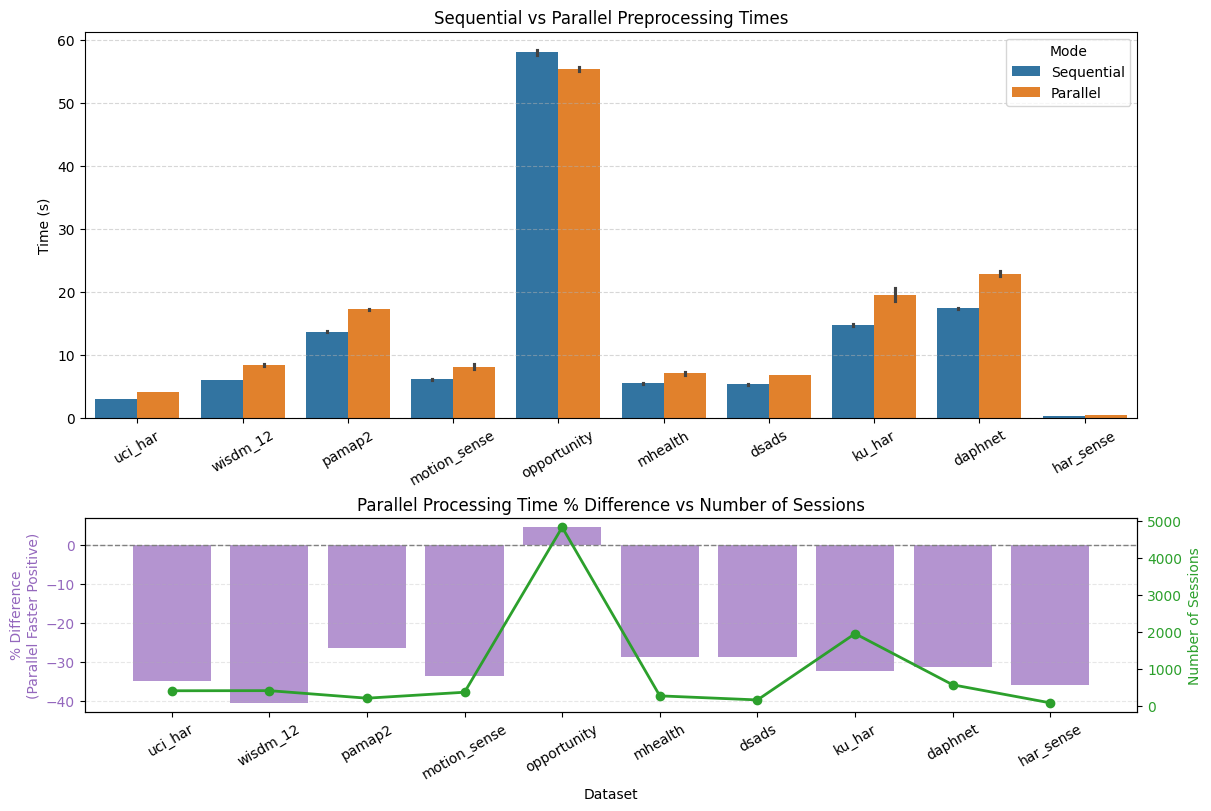

In [ ]:
# Prepare dataframe for sequential vs parallel times
records = []
for dataset in sequential:
    for t in sequential[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Sequential"})
    for t in parallel[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Parallel"})

df = pd.DataFrame(records)

# Calculate mirrored % difference and session count
diff_data = []
for dataset in sequential:
    seq_avg = sum(sequential[dataset]) / len(sequential[dataset])
    par_avg = sum(parallel[dataset]) / len(parallel[dataset])
    # Mirrored % difference: positive means parallel faster
    pct_diff = ((seq_avg - par_avg) / seq_avg) * 100 if seq_avg != 0 else float("nan")
    session_count = len(session_sizes[dataset])
    diff_data.append(
        {"Dataset": dataset, "% Difference": pct_diff, "Session Count": session_count}
    )

diff_df = pd.DataFrame(diff_data)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(12, 8),
    gridspec_kw={"height_ratios": [2, 1]},
    constrained_layout=True,
)

# Barplot Sequential vs Parallel times
sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
ax1.set_title("Sequential vs Parallel Preprocessing Times")
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("")
ax1.tick_params(axis="x", rotation=30)
ax1.legend(title="Mode")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# % Difference vs Session Count with twin y-axis
color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.7)
ax2.axhline(
    0, color="gray", linestyle="--", linewidth=1
)  # Reference line at 0% difference
ax2.set_ylabel("% Difference\n(Parallel Faster Positive)", color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.set_xticklabels(diff_df["Dataset"], rotation=30)
ax2.set_xlabel("Dataset")
ax2.grid(axis="y", linestyle="--", alpha=0.3)
ax2.set_title("Parallel Processing Time % Difference vs Number of Sessions")

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("Number of Sessions", color=color2)
ax2b.tick_params(axis="y", labelcolor=color2)

plt.show()

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/1022773828.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/1022773828.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df['Dataset'], rotation=25, fontsize=tick_fs)


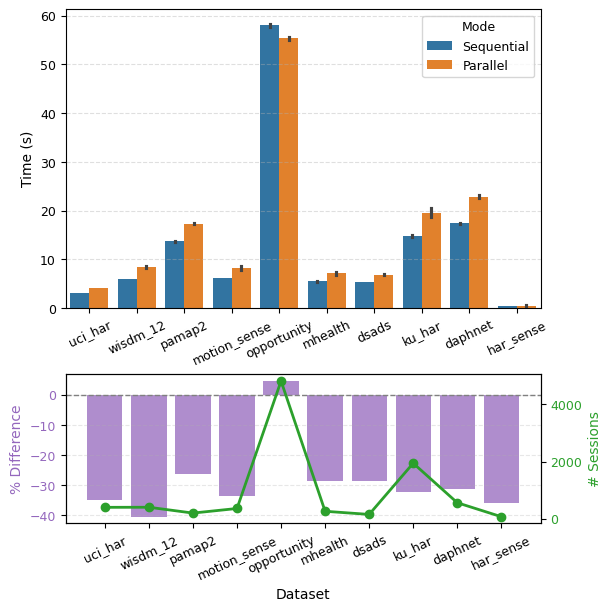

In [ ]:
# Prepare dataframe for sequential vs parallel times
records = []
for dataset in sequential:
    for t in sequential[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Sequential"})
    for t in parallel[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Parallel"})

df = pd.DataFrame(records)

# Calculate mirrored % difference and session count
diff_data = []
for dataset in sequential:
    seq_avg = sum(sequential[dataset]) / len(sequential[dataset])
    par_avg = sum(parallel[dataset]) / len(parallel[dataset])
    pct_diff = ((seq_avg - par_avg) / seq_avg) * 100 if seq_avg != 0 else float("nan")
    session_count = len(session_sizes[dataset])
    diff_data.append(
        {"Dataset": dataset, "% Difference": pct_diff, "Session Count": session_count}
    )

diff_df = pd.DataFrame(diff_data)

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(6, 6), gridspec_kw={"height_ratios": [2, 1]}, constrained_layout=True
)

# Set smaller font sizes
title_fs = 10
label_fs = 10
tick_fs = 9
legend_fs = 9

sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
# ax1.set_title("Sequential vs Parallel Preprocessing Times", fontsize=title_fs)
ax1.set_ylabel("Time (s)", fontsize=label_fs)
ax1.set_xlabel("")
ax1.tick_params(axis="x", rotation=25, labelsize=tick_fs)
ax1.tick_params(axis="y", labelsize=tick_fs)
ax1.legend(
    title="Mode", loc="upper right", fontsize=legend_fs, title_fontsize=legend_fs
)
ax1.grid(axis="y", linestyle="--", alpha=0.4)

color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.75)
ax2.axhline(0, color="gray", linestyle="--", linewidth=1)
ax2.set_ylabel("% Difference", color=color1, fontsize=label_fs)
ax2.tick_params(axis="y", labelcolor=color1, labelsize=tick_fs)
ax2.set_xticklabels(diff_df["Dataset"], rotation=25, fontsize=tick_fs)
ax2.set_xlabel("Dataset", fontsize=label_fs)
ax2.grid(axis="y", linestyle="--", alpha=0.3)
# ax2.set_title("Parallel Processing Time % Difference vs Number of Sessions", fontsize=title_fs)

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("# Sessions", color=color2, fontsize=label_fs)
ax2b.tick_params(axis="y", labelcolor=color2, labelsize=tick_fs)

plt.show()

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/3293497821.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_10790/3293497821.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df['Dataset'], rotation=25, fontsize=tick_fs)


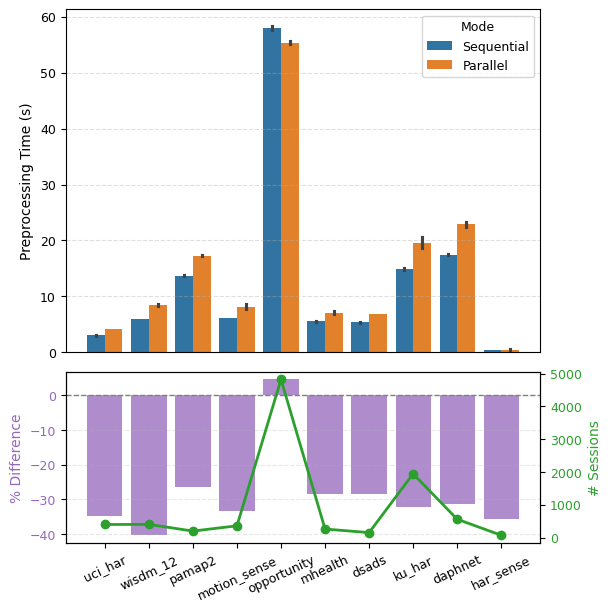

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(6, 6),
    gridspec_kw={"height_ratios": [2, 1]},
    constrained_layout=True,
    sharex=True,  # share x-axis so ticks line up
)

# Set smaller font sizes
title_fs = 10
label_fs = 10
tick_fs = 9
legend_fs = 9

sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
# ax1.set_title("Sequential vs Parallel Preprocessing Times", fontsize=title_fs)
ax1.set_ylabel("Preprocessing Time (s)", fontsize=label_fs)
ax1.set_xlabel("")  # no x label here
ax1.tick_params(
    axis="x", which="both", bottom=False, labelbottom=False
)  # hide x ticks and labels on top plot
ax1.tick_params(axis="y", labelsize=tick_fs)
ax1.legend(
    title="Mode", loc="upper right", fontsize=legend_fs, title_fontsize=legend_fs
)
ax1.grid(axis="y", linestyle="--", alpha=0.4)

color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.75)
ax2.axhline(0, color="gray", linestyle="--", linewidth=1)
ax2.set_ylabel("% Difference", color=color1, fontsize=label_fs)
ax2.tick_params(axis="y", labelcolor=color1, labelsize=tick_fs)
ax2.set_xticklabels(diff_df["Dataset"], rotation=25, fontsize=tick_fs)
ax2.set_xlabel("")  # remove label here to avoid double label
ax2.grid(axis="y", linestyle="--", alpha=0.3)
# ax2.set_title("Parallel Processing Time % Difference vs Number of Sessions", fontsize=title_fs)

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("# Sessions", color=color2, fontsize=label_fs)
ax2b.tick_params(axis="y", labelcolor=color2, labelsize=tick_fs)

# Add one common x-axis label centered below both plots
# fig.text(0.5, 0.04, "Dataset", ha='center', fontsize=label_fs)

plt.show()